In [1]:
import math
import random

In [2]:
def cvm1(xs, eps, delta):
    p = 0 # number of random bits to request
    X = set()
    thresh =  math.floor(12 / (eps ** 2) * math.log(8 * len(xs) / delta))
    for x in xs:
        X.discard(x)
        if(random.getrandbits(p) == 0):
            X.add(x)
        if(len(X) == thresh):
            Y = set()
            for x in X:        
                if(random.getrandbits(1) == 0):
                    Y.add(x)
            X = Y
            p += 1
            if(len(X) == thresh):
                return -1
    return len(X) * (2**p)

def cvm2(xs, eps, delta):
    p = 0 # number of random bits to request
    X = set()
    thresh =  math.floor(12 / (eps ** 2) * math.log(8 * len(xs) / delta))
    for x in xs:
        X.discard(x)
        if(random.getrandbits(p) == 0):
            X.add(x)
        if(len(X) == thresh):
            Y = set()
            for x in X:        
                if(random.getrandbits(1) == 0):
                    Y.add(x)
            X = Y
            p += 1
    return len(X) * (2**p)


In [3]:
nelts = 72344

xs = list(range(nelts))
xs = xs * 20

In [4]:
res1 = [cvm1(xs, 0.1, 0.1) for i in range(100)]
res2 = [cvm1(xs, 0.1, 0.1) for i in range(100)]

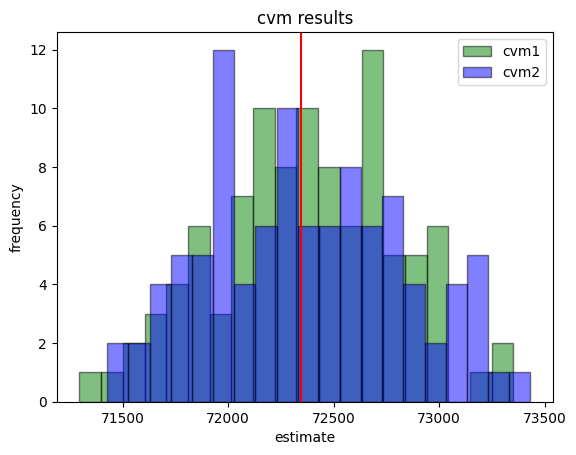

In [19]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

bins = 20

plt.hist(sorted(res1), bins, alpha = 0.5, color='g', edgecolor='black', label='cvm1') # color = 'blue', edgecolor = 'black', bins = bins)
plt.hist(sorted(res2), bins, alpha = 0.5, color='b', edgecolor='black', label='cvm2') # color = 'green', edgecolor = 'black', bins = bins)

# Add labels
plt.title('cvm results')
plt.xlabel('estimate')
plt.ylabel('frequency')
plt.axvline(x = nelts, color='r')
plt.legend(loc='upper right')